# Question 3 - Motion Algorithm 

## 3.1 - Multi-resolution Lucas-Kanade optic flow detection


Extract good points to track from ‘frame1.png’
using Harris corner detection algorithm. Use openCV 
function goodFeaturesToTrack and set parameter value maxCorners=500.
Search optimal values for the rest of the parameters. 
Let us call the detected set of points:


In [134]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# read images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")

# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# parameters for ShiTomasi corner detection
feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.20,
                       minDistance = 15,
                       blockSize = 5 )
# find good corners in the first image
p1 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)

print('Number of good points:',len(p1))

Number of good points: 391


Compute the optical flow between ‘frame1.png’ and ‘frame2.png’ at the points in p1. Use the openCV function calcOpticalFlowPyrLK. Search for optimal values for the parameters.

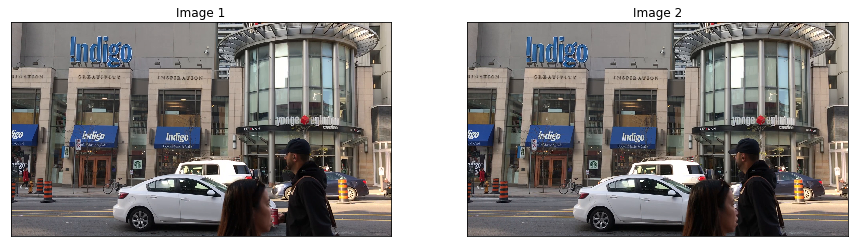

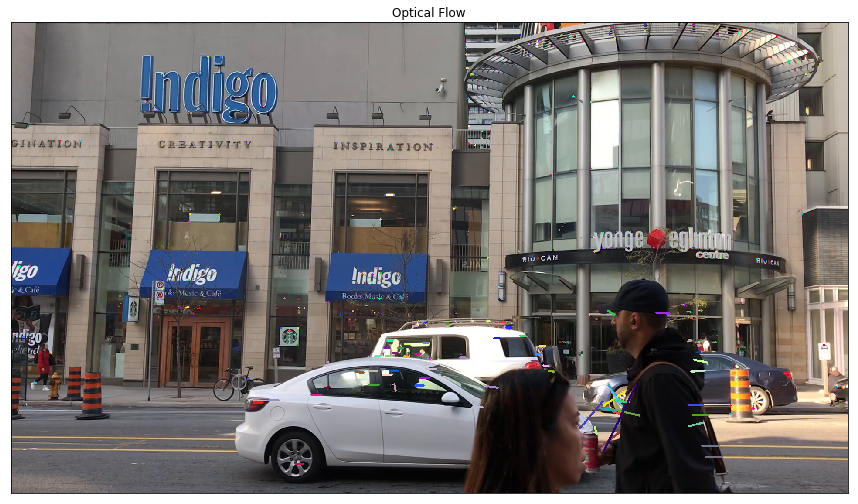

In [126]:
# parameters for lucas kanade optical flow
lk_params = dict( winSize = (10,10),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                             10, 0.03))

# calculate optical flow
p2, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p1, None, **lk_params)

# select good points
good_new = p2[st==1]
good_old = p1[st==1]

# create some random colors
color = np.random.randint(0, 255, (good_new.shape[0], 3))

# create a mask image for drawing purposes
mask = img1.copy()

# draw the tracks
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    mask = cv2.line(mask, (a,b), (c,d), color[i].tolist(), 4)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title("Optical Flow"), plt.xticks([]), plt.yticks([])
plt.show()


Vary the maximum pyramid level from 0 to 10 in the function calcOpticalFlowPyrLK. For each setting, compute the mean of the error at those points whose correspondence search is successful i.e. returned status is 1. Plot the mean (on y-axis) vs. pyramid level (on x-axis). Discuss the trends you observe
in the plot.

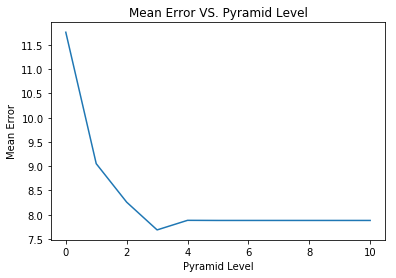

In [139]:
mean_err = []
new_points = []

for py_level in range(11):
    p2, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p1, None, winSize = (15,15),
                      maxLevel = py_level, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    # select good points
    new_points.append(p2[st==1])
    mean_err.append(np.mean(err))
    
x = np.arange(11)
y = mean_err 

plt.plot(x, y)  
plt.xlabel('Pyramid Level') 
plt.ylabel('Mean Error') 
plt.title('Mean Error VS. Pyramid Level') 
plt.show()

## Discussing the Trends

As can be seen from the above figure, increasing the pyramid level decreasing the mean error until a lower maxima is reached. This lower maxima occurs at pyramid level = 3 in our case. After this, increasing the pyramid level to 4 results in a small increase in the mean error at which point the mean error stabilizes. Thus any increasing the pyramid level past this points has no change on the mean error.

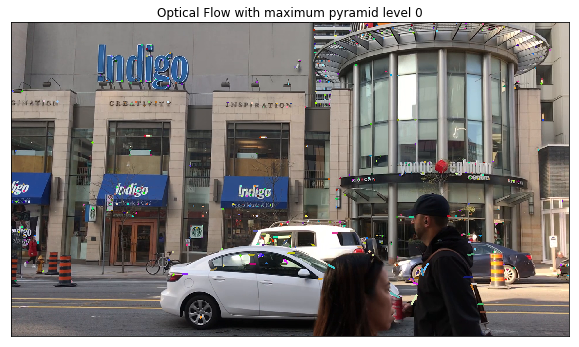

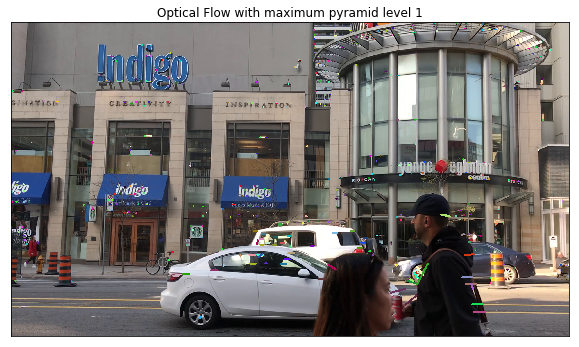

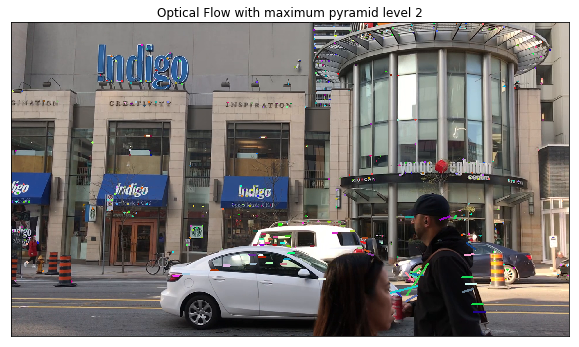

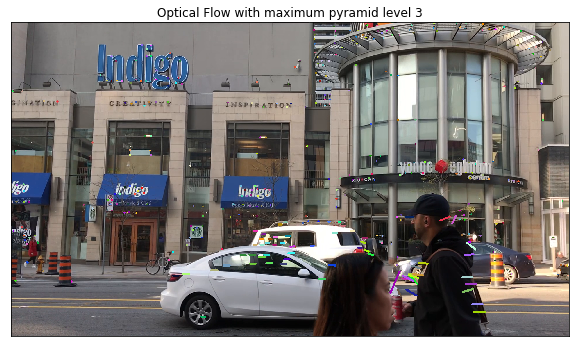

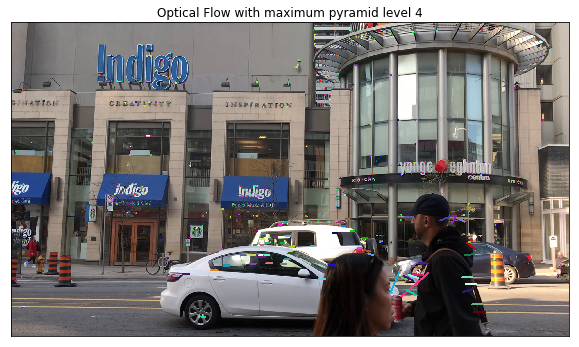

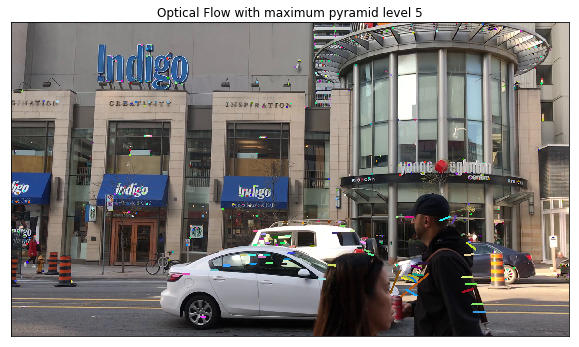

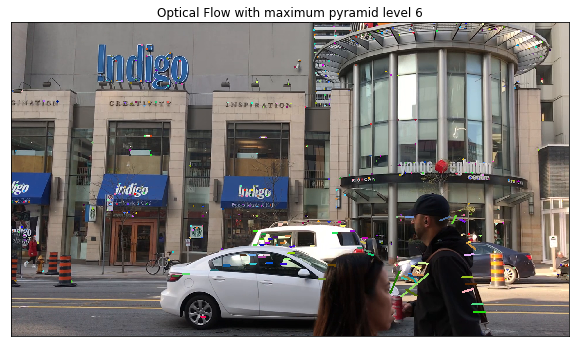

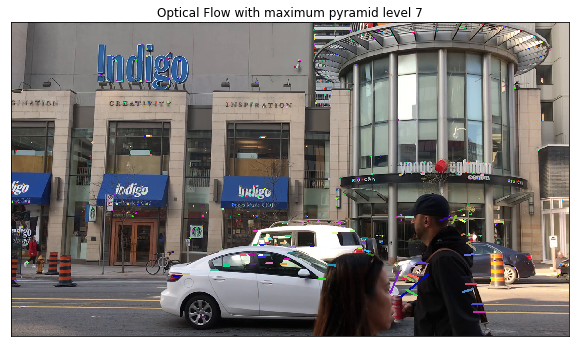

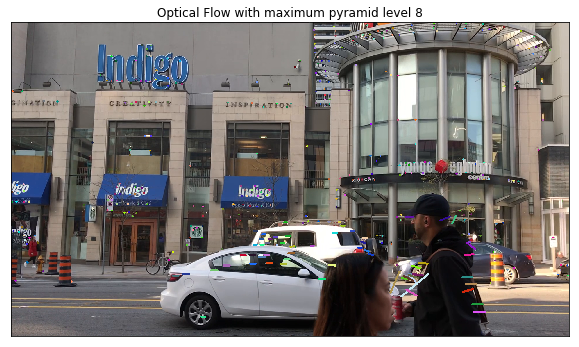

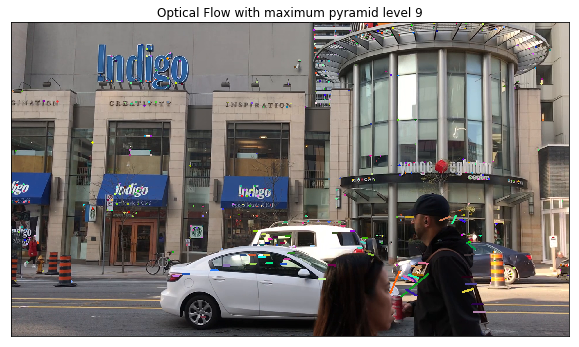

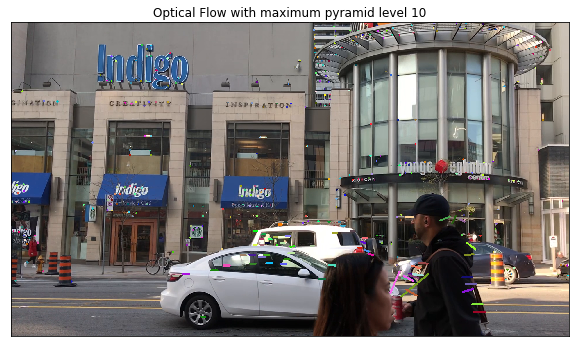

In [150]:
for i in range(11):
    # select good points
    good_new = new_points[i]
    good_old = p1[st==1]

    # create some random colors
    color = np.random.randint(0, 255, (good_new.shape[0], 3))

    # create a mask image for drawing purposes
    mask = img1.copy()

    # draw the tracks
    for j, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a,b), (c,d), color[j].tolist(), 5)
        
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.title("Optical Flow with maximum pyramid level %i" % i), plt.xticks([]), plt.yticks([])
    plt.show()

## Discussing the Trends

As can be seen from the above figures, increasing the pyramid level significantly emphasizes the significant points. Indeed, comparing the first and last image with pyramid levels 0 and 10 respectively, it can be seen that the tracks on the man are much longer and more emphasized in the latter image. Thus, we can say that increasing the pyramid level results in a more precise flow.